In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/dailydialog/dailydialog.csv")

In [3]:
df

,Emotion,Text
0,0,"Say , Jim , how about going for a few beers af..."
1,0,You know that is tempting but is really not g...
2,0,What do you mean ? It will help us to relax .
3,0,Do you really think so ? I don't . It will ju...
4,0,I guess you are right.But what shall we do ? ...
...,...,...
102974,0,"Oh , it must be very precious . Is it breakab..."
102975,0,"No , if you take some care when you use them ."
102976,0,How much is it ?
102977,0,Two thousand .


In [4]:
import re

def clean_text(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return x

def clean_numbers(x):
    if bool(re.search(r'\d', x)):
        x = re.sub('[0-9]{5,}', '#####', x)
        x = re.sub('[0-9]{4}', '####', x)
        x = re.sub('[0-9]{3}', '###', x)
        x = re.sub('[0-9]{2}', '##', x)
    return x

In [5]:
df.Text = df.Text.apply(clean_text)
df.Text = df.Text.apply(clean_numbers)

In [6]:
df

,Emotion,Text
0,0,"Say , Jim , how about going for a few beers af..."
1,0,You know that is tempting but is really not g...
2,0,What do you mean ? It will help us to relax .
3,0,Do you really think so ? I don't . It will ju...
4,0,I guess you are right.But what shall we do ? ...
...,...,...
102974,0,"Oh , it must be very precious . Is it breakab..."
102975,0,"No , if you take some care when you use them ."
102976,0,How much is it ?
102977,0,Two thousand .


In [7]:
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have"}


def replace_contractions(contraction_dict):
    contraction_re = re.compile('(%s)' % '|'.join(contraction_dict.keys()))

    def replace(match):
        return contraction_dict[match.group(0)]

    def replacer(text):
        return contraction_re.sub(replace, text)

    return replacer


replacer = replace_contractions(contraction_dict)

In [8]:
df.Text = df.Text.apply(replacer)

In [9]:
df

,Emotion,Text
0,0,"Say , Jim , how about going for a few beers af..."
1,0,You know that is tempting but is really not g...
2,0,What do you mean ? It will help us to relax .
3,0,Do you really think so ? I don't . It will ju...
4,0,I guess you are right.But what shall we do ? ...
...,...,...
102974,0,"Oh , it must be very precious . Is it breakab..."
102975,0,"No , if you take some care when you use them ."
102976,0,How much is it ?
102977,0,Two thousand .


In [10]:
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer('basic_english')

df.Text = df.Text.apply(tokenizer)


In [11]:
df

,Emotion,Text
0,0,"[say, ,, jim, ,, how, about, going, for, a, fe..."
1,0,"[you, know, that, is, tempting, but, is, reall..."
2,0,"[what, do, you, mean, ?, it, will, help, us, t..."
3,0,"[do, you, really, think, so, ?, i, don, ', t, ..."
4,0,"[i, guess, you, are, right, ., but, what, shal..."
...,...,...
102974,0,"[oh, ,, it, must, be, very, precious, ., is, i..."
102975,0,"[no, ,, if, you, take, some, care, when, you, ..."
102976,0,"[how, much, is, it, ?]"
102977,0,"[two, thousand, .]"


In [12]:
from nltk.stem import SnowballStemmer

def stemmer(textroll):
    stmmr = SnowballStemmer("english")
    return [stmmr.stem(w) for w in textroll]

df.Text = df.Text.apply(stemmer)

In [13]:
df

,Emotion,Text
0,0,"[say, ,, jim, ,, how, about, go, for, a, few, ..."
1,0,"[you, know, that, is, tempt, but, is, realli, ..."
2,0,"[what, do, you, mean, ?, it, will, help, us, t..."
3,0,"[do, you, realli, think, so, ?, i, don, ', t, ..."
4,0,"[i, guess, you, are, right, ., but, what, shal..."
...,...,...
102974,0,"[oh, ,, it, must, be, veri, precious, ., is, i..."
102975,0,"[no, ,, if, you, take, some, care, when, you, ..."
102976,0,"[how, much, is, it, ?]"
102977,0,"[two, thousand, .]"


In [14]:
def purge(textroll):
    return [ w for w in textroll if not w in {"", None, " ", ".", ","} ]

df.Text = df.Text.apply(purge)

In [15]:
MAX_LEN = 50
x = df.Text.apply(len)

In [16]:
def padd_cut(max_len, padd_token="[PAD]"):
    def wrapped(text):
        if len(text) >= max_len:
            return text[:max_len]
        text += [padd_token] * (max_len - len(text))
        return text
    return wrapped

df.Text = df.Text.apply(padd_cut(MAX_LEN))

In [17]:
df

,Emotion,Text
0,0,"[say, jim, how, about, go, for, a, few, beer, ..."
1,0,"[you, know, that, is, tempt, but, is, realli, ..."
2,0,"[what, do, you, mean, ?, it, will, help, us, t..."
3,0,"[do, you, realli, think, so, ?, i, don, ', t, ..."
4,0,"[i, guess, you, are, right, but, what, shall, ..."
...,...,...
102974,0,"[oh, it, must, be, veri, precious, is, it, bre..."
102975,0,"[no, if, you, take, some, care, when, you, use..."
102976,0,"[how, much, is, it, ?, [PAD], [PAD], [PAD], [P..."
102977,0,"[two, thousand, [PAD], [PAD], [PAD], [PAD], [P..."


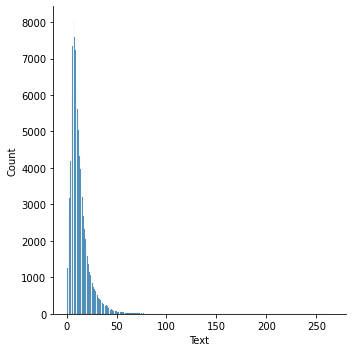

In [18]:
import seaborn as sns
sns.displot(x)

In [19]:
from torchtext.vocab import GloVe

embedding_glove = GloVe(name="6B", dim=100)

.vector_cache/glove.6B.zip: 862MB [02:54, 4.93MB/s]                           
100%|█████████▉| 399999/400000 [00:12<00:00, 33004.78it/s]


In [21]:
embedding_glove["[PAD]"]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])